In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt;
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [194]:
data = pd.read_csv('./2016-17-to-2018-19-immunizations.csv', encoding = "ISO-8859-1" )##, index_col = 0)  
data = data.applymap(lambda s:s.lower() if type(s) == str else s)
data.head()

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN,NaN


In [195]:
data.tail()

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN
263070,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,vari,NaN,NaN


In [196]:
data.describe()

,SCHOOL_CODE,ENROLLMENT,COUNT,PERCENT
count,2.630710e+05,253187.000000,81934.000000,207822.000000
mean,5.444149e+06,70.915351,38.144348,54.817045
std,2.111153e+06,49.893938,50.513140,46.702010
min,5.274900e+04,1.000000,0.000000,0.000000
25%,6.015416e+06,29.000000,0.000000,2.000000
50%,6.045611e+06,70.000000,4.000000,94.000000
75%,6.133714e+06,102.000000,73.000000,98.000000
max,9.915507e+06,1117.000000,916.000000,99.000000


In [197]:
data.nunique()

SCHOOL_YEAR          3
SCHOOL_CODE       8863
COUNTY              58
PUBLIC_PRIVATE       2
CITY              1027
SCHOOL_NAME       8369
REPORTED             2
ENROLLMENT         297
CATEGORY            11
COUNT              315
PERCENT            100
dtype: int64

In [198]:
data.shape

(263071, 11)

In [199]:
data.columns

Index(['SCHOOL_YEAR', 'SCHOOL_CODE', 'COUNTY', 'PUBLIC_PRIVATE', 'CITY',
       'SCHOOL_NAME', 'REPORTED', 'ENROLLMENT', 'CATEGORY', 'COUNT',
       'PERCENT'],
      dtype='object')

In [200]:
#finding and droppping duplicate rows
def duplicate_rows_based_on_col(df, columns): return df[df.duplicated(columns)]
duplicate_rows_based_on_col(data,['SCHOOL_YEAR','CATEGORY'])

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
11,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,pme,NaN,5.0
12,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,pbe,NaN,5.0
13,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,overdue,NaN,5.0
14,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,others,NaN,5.0
15,2016-2017,100016,madera,public,madera,sherman thomas charter,y,30.0,conditional,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [201]:
# checking for garbage values in each columns

In [202]:
data['SCHOOL_YEAR'].unique()

array(['2016-2017', '2017-2018', '2018-2019'], dtype=object)

In [203]:
data['SCHOOL_CODE'].unique()

array([  52749,  100016,  100024, ..., 7337100, 7614391, 9070187],
      dtype=int64)

In [204]:
data['COUNTY'].unique()

array(['monterey', 'madera', 'el dorado', 'tuolumne', 'san bernardino',
       'alameda', 'riverside', 'san joaquin', 'los angeles', 'ventura',
       'santa cruz', 'sacramento', 'contra costa', 'san diego', 'sutter',
       'kern', 'orange', 'mendocino', 'stanislaus', 'sonoma', 'kings',
       'tulare', 'santa barbara', 'tehama', 'butte', 'santa clara',
       'merced', 'placer', 'fresno', 'san mateo', 'yuba', 'lake',
       'san luis obispo', 'napa', 'humboldt', 'shasta', 'yolo',
       'san francisco', 'solano', 'imperial', 'del norte', 'nevada',
       'san benito', 'siskiyou', 'lassen', 'marin', 'glenn', 'mariposa',
       'trinity', 'amador', 'calaveras', 'colusa', 'plumas', 'alpine',
       'inyo', 'modoc', 'mono', 'sierra'], dtype=object)

In [205]:
data['PUBLIC_PRIVATE'].unique()

array(['private', 'public'], dtype=object)

In [206]:
data['CITY'].unique()

array(['prunedale', 'madera', 'el dorado hills', ..., 'windsor hills',
       'oja', 'lancaster,'], dtype=object)

In [207]:
data['SCHOOL_NAME'].unique()

array(['prunedale christian academy', 'sherman thomas charter',
       'oak meadow elementary', ...,
       'montessori elementary and middle school of tracy',
       'toddler tech university',
       'claires montessori international academy'], dtype=object)

In [208]:
data['REPORTED'].unique()

array(['y', 'n'], dtype=object)

In [209]:
data['ENROLLMENT'].unique()

array([1.000e+01, 3.000e+01, 1.270e+02, 1.000e+00, 5.600e+01, 8.300e+01,
       1.800e+01, 1.400e+02, 1.200e+02, 1.160e+02,       nan, 6.700e+01,
       1.070e+02, 5.900e+01, 1.210e+02, 1.100e+02, 9.800e+01, 9.000e+01,
       1.290e+02, 1.120e+02, 9.900e+01, 9.100e+01, 1.080e+02, 1.110e+02,
       1.300e+02, 1.130e+02, 1.500e+02, 8.100e+01, 4.000e+01, 1.370e+02,
       1.140e+02, 8.800e+01, 1.480e+02, 1.440e+02, 1.430e+02, 5.800e+01,
       1.930e+02, 1.020e+02, 9.500e+01, 8.400e+01, 4.800e+01, 4.900e+01,
       9.600e+01, 1.740e+02, 1.570e+02, 6.800e+01, 1.360e+02, 1.610e+02,
       1.560e+02, 1.240e+02, 1.200e+01, 4.000e+00, 1.420e+02, 7.800e+01,
       5.000e+01, 1.040e+02, 9.400e+01, 8.600e+01, 1.250e+02, 1.150e+02,
       1.000e+02, 7.200e+01, 1.050e+02, 1.380e+02, 1.350e+02, 1.540e+02,
       1.010e+02, 1.720e+02, 7.100e+01, 5.000e+00, 5.200e+01, 6.400e+01,
       1.530e+02, 1.230e+02, 2.160e+02, 4.500e+01, 1.090e+02, 2.000e+00,
       1.920e+02, 1.470e+02, 8.900e+01, 1.510e+02, 

In [210]:
data['CATEGORY'].unique()

array(['pbe', 'hepb', 'dtp', 'polio', 'up-to-date', 'others', 'vari',
       'conditional', 'overdue', 'pme', 'mmr'], dtype=object)

In [211]:
data['COUNT'].unique()

array([ nan,   0.,   2., 121., 123., 124.,   4.,   8., 128., 132., 135.,
         3., 117.,   1.,  56.,  57.,   7., 112., 114., 116., 119., 122.,
         5., 107., 108., 103., 105., 106., 109., 110., 111., 146.,  35.,
        36.,  37.,   9.,  10., 130., 134., 137., 139., 141., 131.,  12.,
        18., 143., 153., 160., 163., 166., 169., 126., 136., 100.,  90.,
        92.,  89.,  91.,   6., 165., 170., 154.,  21., 133., 138., 144.,
       147., 149., 152.,  76.,  48.,  14.,  64.,  65.,  68.,  71.,  74.,
       142., 145.,  97.,  81.,  82.,  83., 151., 167., 168.,  66.,  60.,
        61.,  62., 148., 150.,  40.,  41., 104., 185., 186., 187.,  67.,
        93.,  95.,  54.,  55.,  51.,  84., 101.,  25.,  29., 178., 182.,
       184., 191.,  17.,  85.,  49.,  96.,  98., 102.,  77.,  72.,  73.,
        24., 120.,  80.,  78., 127., 115., 157.,  63.,  69., 118.,  99.,
        58.,  26.,  27.,  28., 171., 140., 113.,  94., 278., 292., 293.,
       297., 226.,  19.,  79.,  23., 129.,  75.,  1

In [212]:
data['PERCENT'].unique()

array([nan,  5., 95.,  0.,  2., 97., 98.,  3.,  6., 91., 94., 96., 99.,
        1., 93.,  8., 88., 90.,  7., 87., 89.,  4.,  9., 74., 79., 83.,
       85., 86., 13., 82., 92., 12., 14., 62., 63., 65., 68., 71., 73.,
       11., 38., 61., 66., 67., 76., 46., 54., 17., 10., 29., 78., 80.,
       15., 60., 70., 16., 84., 20., 50., 51., 53., 56., 43., 49., 57.,
       58., 77., 81., 32., 52., 18., 75., 41., 59., 69., 31., 40., 42.,
       44., 47., 55., 19., 26., 48., 72., 64., 39., 33., 36., 37., 35.,
       45., 21., 34., 30., 27., 28., 23., 22., 24., 25.])

In [213]:
#checking null values
data.isnull().sum()

SCHOOL_YEAR            0
SCHOOL_CODE            0
COUNTY                 0
PUBLIC_PRIVATE         0
CITY                   0
SCHOOL_NAME            0
REPORTED               0
ENROLLMENT          9884
CATEGORY               0
COUNT             181137
PERCENT            55249
dtype: int64

In [214]:
# getting rows with null columns
def nans(df): return df[df.isnull().any(axis=1)]
def nans_col(df, column): return df[df[column].isnull()]

In [215]:
nans(data)

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [216]:
nans_col(data, 'ENROLLMENT')

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
110,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,polio,NaN,NaN
111,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,up-to-date,NaN,NaN
112,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,pme,NaN,NaN
113,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,overdue,NaN,NaN
114,2016-2017,100289,los angeles,public,los angeles,n.e.w. academy of science and arts,n,NaN,dtp,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263046,2018-2019,9009259,los angeles,private,la canada,hillside school and learning center,n,NaN,dtp,NaN,NaN
263047,2018-2019,9009259,los angeles,private,la canada,hillside school and learning center,n,NaN,polio,NaN,NaN
263048,2018-2019,9009259,los angeles,private,la canada,hillside school and learning center,n,NaN,mmr,NaN,NaN
263049,2018-2019,9009259,los angeles,private,la canada,hillside school and learning center,n,NaN,hepb,NaN,NaN


In [217]:
#rows dropped with columns enrollment, count, percent nan
df_new = data.dropna(subset=['ENROLLMENT', 'COUNT', 'PERCENT'], thresh=1)
df_new

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [218]:
df_new.isnull().sum()

SCHOOL_YEAR            0
SCHOOL_CODE            0
COUNTY                 0
PUBLIC_PRIVATE         0
CITY                   0
SCHOOL_NAME            0
REPORTED               0
ENROLLMENT             0
CATEGORY               0
COUNT             171253
PERCENT            45365
dtype: int64

In [219]:
nans_col(df_new, 'PERCENT')

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [220]:
nans_col(df_new, 'COUNT')

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN,NaN


In [221]:
df_new.isnull().sum()

SCHOOL_YEAR            0
SCHOOL_CODE            0
COUNTY                 0
PUBLIC_PRIVATE         0
CITY                   0
SCHOOL_NAME            0
REPORTED               0
ENROLLMENT             0
CATEGORY               0
COUNT             171253
PERCENT            45365
dtype: int64

In [222]:
#fill count where percent is present
for index, row in df_new.iterrows():
    if pd.isnull(row['COUNT']) and pd.notnull(row['PERCENT']):
        new_count_value = np.ceil(row['ENROLLMENT'] * (row['PERCENT'] / 100))
        df_new.at[index,'COUNT'] = new_count_value
#checking sum afterwards
df_new.isnull().sum()

SCHOOL_YEAR           0
SCHOOL_CODE           0
COUNTY                0
PUBLIC_PRIVATE        0
CITY                  0
SCHOOL_NAME           0
REPORTED              0
ENROLLMENT            0
CATEGORY              0
COUNT             45365
PERCENT           45365
dtype: int64

In [223]:
#percentage column can be dropped because this coulmn can be calculated
df_new = df_new.drop('PERCENT', 1)
df_new

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,NaN
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,NaN
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,NaN
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,NaN
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,NaN
...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,NaN
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,NaN
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,NaN
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,NaN


In [224]:
#filling remaining count with avg count of school that year

for row in df_new['SCHOOL_YEAR'].unique():
    df_new_set_by_year = df_new.loc[df_new['SCHOOL_YEAR'] == row]
    for row2 in df_new_set_by_year['SCHOOL_NAME'].unique():
        df_new_set_with_year_and_school_name = df_new_set_by_year[df_new_set_by_year['SCHOOL_NAME'] == row2]
        mean_school_year_with_school = np.ceil(df_new_set_with_year_and_school_name['ENROLLMENT'].mean())
        #where count is nan put the avg
        for index, rows in df_new_set_with_year_and_school_name.iterrows():
            if pd.isnull(rows['COUNT']):
                df_new.at[index,'COUNT'] = mean_school_year_with_school
        
        #print(df_new_set_with_year_and_school_name.count())
        #print(df_new_set_with_year_and_school_name['ENROLLMENT'].mean())
        
#df_new.loc[(df_new['SCHOOL_YEAR'] == '2016-2017') & (df_new['SCHOOL_NAME'] == 'WOOD ROSE ACADEMY') , 'ENROLLMENT']

    

In [225]:
df_new.isnull().sum()

SCHOOL_YEAR       0
SCHOOL_CODE       0
COUNTY            0
PUBLIC_PRIVATE    0
CITY              0
SCHOOL_NAME       0
REPORTED          0
ENROLLMENT        0
CATEGORY          0
COUNT             0
dtype: int64

In [226]:
df_new

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,10.0
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,10.0
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,10.0
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,10.0
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,10.0
...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,dtp,15.0
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,polio,15.0
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,mmr,15.0
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,15.0,hepb,15.0


In [227]:
#replacing count with enrollment where count > enrollment
for index, rows in df_new.loc[df_new['ENROLLMENT'] < df_new['COUNT']].iterrows():
    df_new.at[index, 'COUNT'] = rows['ENROLLMENT']


In [228]:
#finding and removing duplicate rows
#find duplicate rows based on repitition of SCHOOL_YEAR, SCHOOL_CODE, CATEGORY
duplicate_rows_based_on_col(data,['SCHOOL_YEAR','SCHOOL_CODE','CATEGORY'])

#since no repitition so no need to remove duplicates

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,PERCENT


In [229]:
# x = df_new[['COUNT', 'ENROLLMENT']].values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
# df_new['COUNT'] = df[0]
# df_new['ENROLLMENT'] = df[1]

In [230]:
# df_new['COUNT'] = x[:,0]
# df_new['ENROLLMENT'] = x[:,1]

In [231]:
#normalizing data from enrollment and count
# df_normalized = df_new[['ENROLLMENT', 'COUNT']]
# df_normalized = preprocessing.normalize(df_normalized, axis=0)
# df_normalized
# df_normalized = pd.DataFrame(df_normalized, columns=['ENROLLMENT','COUNT'])

# df_new['ENROLLMENT'] = df_normalized['ENROLLMENT']
# df_new['COUNT'] = df_normalized['COUNT']
# df_new.head()

In [232]:
normalized_count = []
min_count = df_new['COUNT'].min()
max_count = df_new['COUNT'].max()
for value in df_new['COUNT']:
    normalized_count.append((value - min_count)/(max_count - min_count))

normalized_enrollment = []
min_enrol = df_new['ENROLLMENT'].min()
max_enrol = df_new['ENROLLMENT'].max()
for value in df_new['ENROLLMENT']:
    normalized_enrollment.append((value - min_enrol)/(max_enrol - min_enrol))

In [233]:
df_norm = df_new.copy()
df_norm['ENROLLMENT'] = normalized_enrollment
df_norm['COUNT'] = normalized_count
df_norm

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,pbe,0.010917
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,hepb,0.010917
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,dtp,0.010917
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,polio,0.010917
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,up-to-date,0.010917
...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,0.012545,dtp,0.016376
263067,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,0.012545,polio,0.016376
263068,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,0.012545,mmr,0.016376
263069,2018-2019,9070187,contra costa,private,concord,wood rose academy,y,0.012545,hepb,0.016376


In [234]:
#at this point df_new is the null removed, duplicate checked, normalized dataset

In [235]:
df_norm.groupby(['SCHOOL_YEAR', 'PUBLIC_PRIVATE']).head()

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,pbe,0.010917
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,hepb,0.010917
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,dtp,0.010917
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,polio,0.010917
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,0.008065,up-to-date,0.010917
11,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.025986,pme,0.002183
12,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.025986,pbe,0.002183
13,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.025986,overdue,0.002183
14,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.025986,others,0.002183
15,2016-2017,100016,madera,public,madera,sherman thomas charter,y,0.025986,conditional,0.002183


<h3>Visualizing the Data</h3>


pbe 15777
hepb 23741
dtp 23741
polio 23741
up-to-date 23741
others 23741
vari 23741
conditional 23741
overdue 23741
pme 23741
mmr 23741


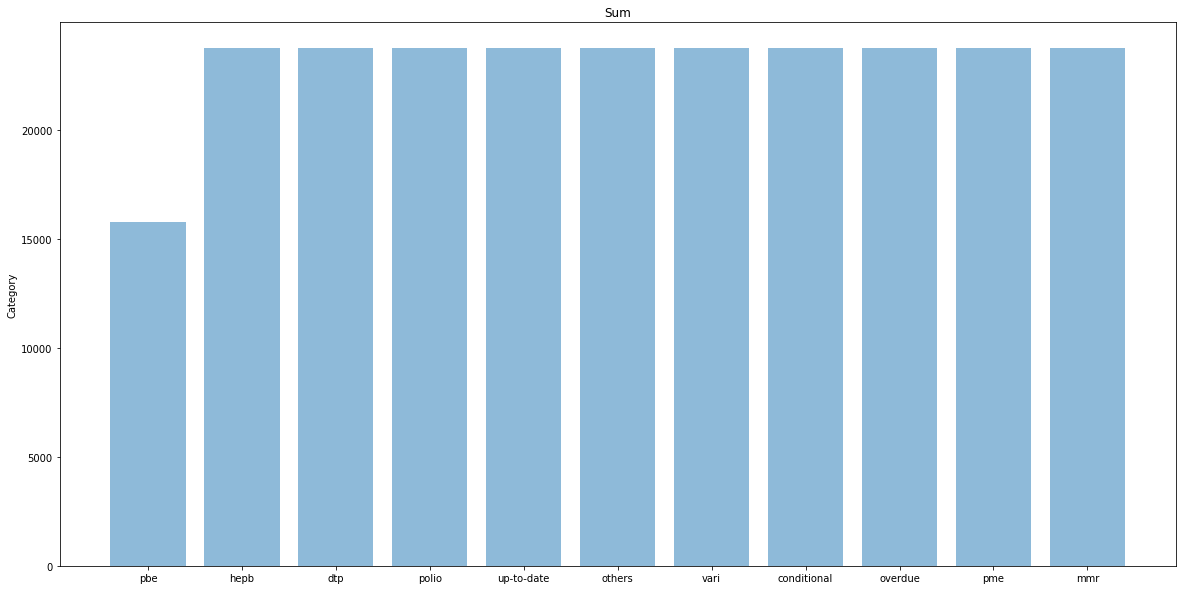

In [236]:
x = []
y = []
for category in df_norm['CATEGORY'].unique():
    row_count = df_norm.loc[df_norm['CATEGORY'] == category, 'CATEGORY'].count()
    print(category, row_count)
    x.append(category)
    y.append(row_count)
plt.figure(figsize=(20,10))
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Category')
plt.title('Sum')

plt.show()

#for row in df_new['SCHOOL_YEAR'].unique():
 #   row_set_checked = df_new.loc[(df_new['SCHOOL_YEAR'] == row) & df_new['CATEGORY'] == 'PBE']
  #  row_set_checked.head()
    
    #print(row , row_set_checked['ENROLLMENT'].sum(), row_set_checked['COUNT'].sum())

<AxesSubplot:>

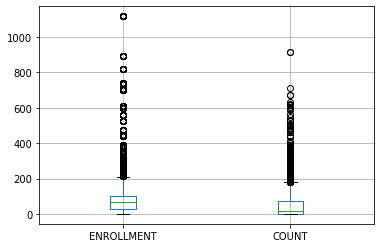

In [237]:
df_new.boxplot(['ENROLLMENT', 'COUNT'])

<AxesSubplot:>

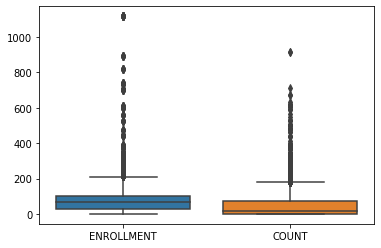

In [238]:
sns.boxplot(data=df_new[['ENROLLMENT', 'COUNT']])

In [239]:
df_norm.describe()

,SCHOOL_CODE,ENROLLMENT,COUNT
count,2.531870e+05,253187.000000,253187.000000
mean,5.428527e+06,0.062648,0.043560
std,2.113884e+06,0.044708,0.052354
min,5.274900e+04,0.000000,0.000000
25%,6.014930e+06,0.025090,0.002183
50%,6.043632e+06,0.061828,0.016376
75%,6.118202e+06,0.090502,0.080786
max,9.915507e+06,1.000000,1.000000


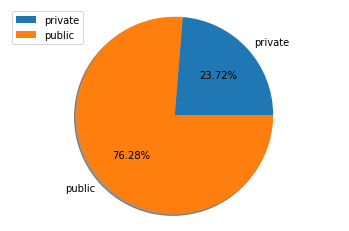

In [240]:
school = df_new['PUBLIC_PRIVATE'].unique()
val = []
for item in school:
    val.append(sum(item == df_new['PUBLIC_PRIVATE']))

plt.pie(val, labels = school, shadow=True, autopct='%1.2f%%')
plt.legend()
plt.axis('equal')
plt.show()

76% of the schools in the Data are <strong>Public</strong> and 24% are <strong>Private</strong>

Now drawing a pie chart to indicate the percentage of each immunization category in the whole data

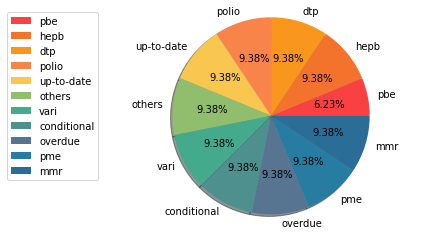

In [241]:
category = df_new['CATEGORY'].unique()
val = []
for item in category:
    val.append(sum(item == df_new['CATEGORY']))

color = ['#f94144', '#f3722c', '#f8961e', '#f9844a', '#f9c74f', '#90be6d', '#43aa8b', '#4d908e', '#577590', '#277da1',
         '#2a6d97']
plt.pie(val, labels = category, shadow=True, autopct='%1.2f%%', colors=color)
plt.legend(bbox_to_anchor=(0,1))
plt.axis('equal')
plt.show()

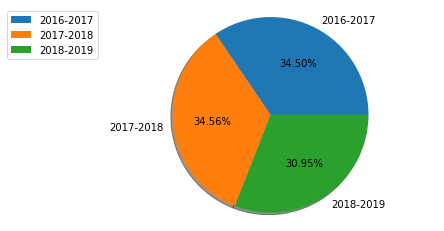

In [242]:
year = df_norm['SCHOOL_YEAR'].unique()
enrol = []
count = []
for item in year:
    enrol.append(sum(df_norm.loc[df_norm['SCHOOL_YEAR'] == item, 'ENROLLMENT']))
    count.append(sum(df_norm.loc[df_norm['SCHOOL_YEAR'] == item, 'COUNT']))

plt.pie(np.ceil(enrol), labels = year, shadow=True, autopct='%1.2f%%')
plt.legend()
plt.axis('equal')
plt.legend(bbox_to_anchor=(0,1))
plt.show()

The above pie chart shows the percentage of enrolment by year.

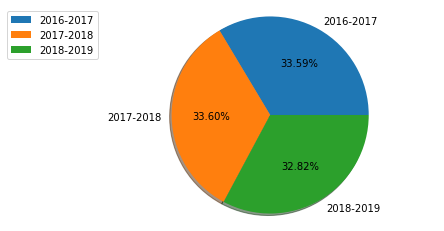

In [243]:
plt.pie(count, labels = year, shadow=True, autopct='%1.2f%%')
plt.legend()
plt.axis('equal')
plt.legend(bbox_to_anchor=(0,1))
plt.show()

The above pie chart shows the percentage of vaccinated students by year.

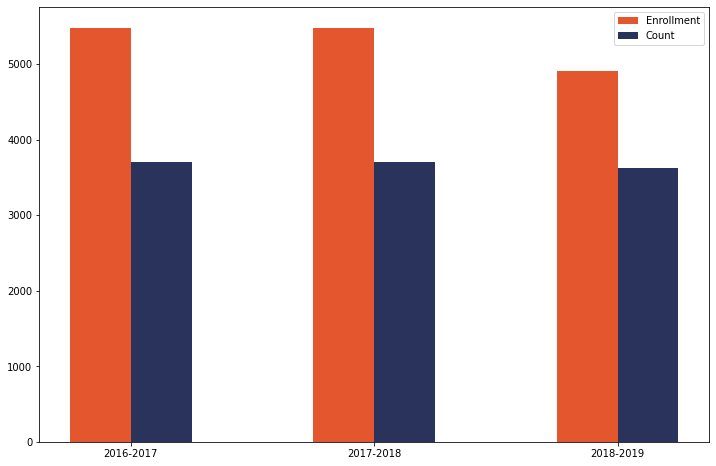

In [244]:
X = np.arange(3)
plt.figure(figsize=[12, 8])
plt.bar(X, enrol, color='#E4572E', width = 0.25)
plt.bar(X+0.25, count, color='#29335C', width = 0.25)
leg = plt.legend(labels=['Enrollment', 'Count'])
xt = plt.xticks(ticks=[0.125, 1.125, 2.125] , labels=year)
# ax = plt.gca()
# ax.set_xticks([year])

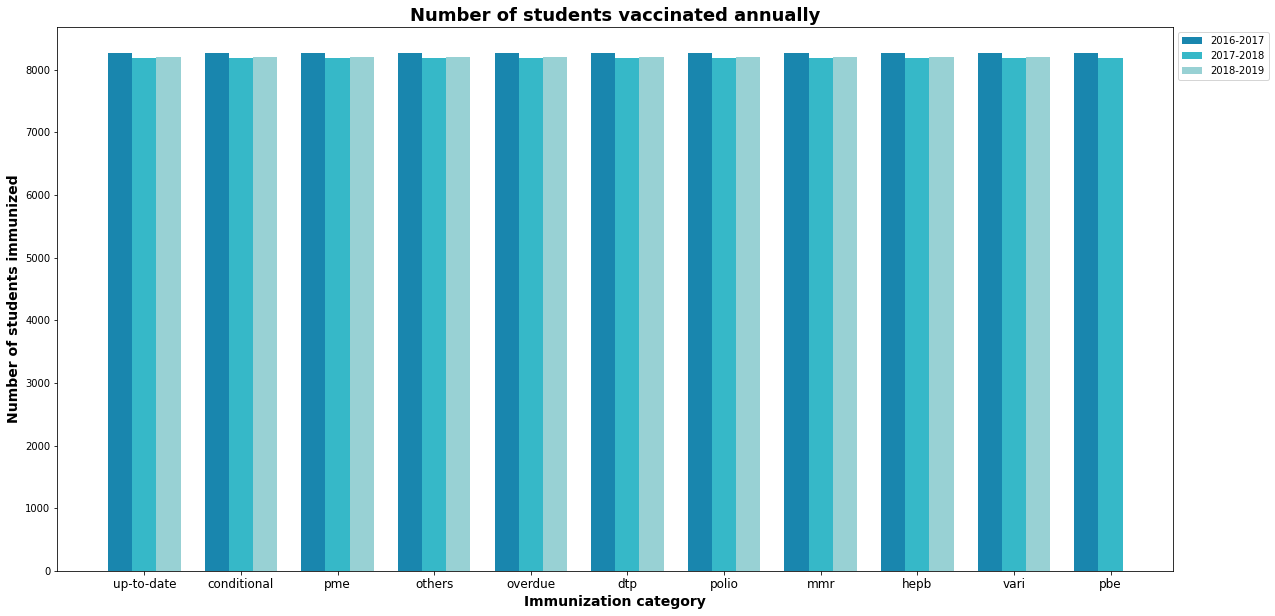

In [245]:
D = data[['SCHOOL_YEAR', 'CATEGORY']]
vals = {}
for i in D.index:
    y = D['SCHOOL_YEAR'][i]
    c = D['CATEGORY'][i]
    if y in vals:
        if c in vals[y]:
            vals[y][c] += 1
        else:
            vals[y][c] = 1
    else:
        vals[y] = {c:1}

width = 0.25
i = 0
fig, ax = plt.subplots(figsize=(20,10))
c = ['#1986AE', '#36B8C8', '#98D1D4']
for key in list(vals.keys()):
    categories = list(vals[key].keys())
    counts = list(vals[key].values())
    x = np.arange(len(categories))
    ax.bar(x + i*width, counts, width, color=c[i], label=key)
    i += 1

plt.legend(bbox_to_anchor=(1,1))
L = list(vals['2018-2019'].keys())
L.append('pbe')
tick = plt.xticks(ticks=np.arange(11)+0.25, labels=L, fontsize=12)
xlab = plt.xlabel('Immunization category', fontsize=14, fontweight='bold')
ylab = plt.ylabel('Number of students immunized', fontsize=14, fontweight='bold')
t = plt.title('Number of students vaccinated annually', fontsize=18, fontweight='bold')

In [246]:
df1 = df_new.copy()
le = LabelEncoder()
df1['COUNTY'] = le.fit_transform(df1['COUNTY'])                       
df1['PUBLIC_PRIVATE'] = le.fit_transform(df1['PUBLIC_PRIVATE'])
df1['CITY'] = le.fit_transform(df1['CITY'])
df1['SCHOOL_NAME'] = le.fit_transform(df1['SCHOOL_NAME'])
df1['REPORTED'] = le.fit_transform(df1['REPORTED'])
df1['CATEGORY'] = le.fit_transform(df1['CATEGORY'])

In [247]:
df1

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT
0,2016-2017,52749,26,0,722,5514,0,10.0,6,10.0
1,2016-2017,52749,26,0,722,5514,0,10.0,2,10.0
2,2016-2017,52749,26,0,722,5514,0,10.0,1,10.0
3,2016-2017,52749,26,0,722,5514,0,10.0,8,10.0
4,2016-2017,52749,26,0,722,5514,0,10.0,9,10.0
...,...,...,...,...,...,...,...,...,...,...
263066,2018-2019,9070187,6,0,193,7810,0,15.0,1,15.0
263067,2018-2019,9070187,6,0,193,7810,0,15.0,8,15.0
263068,2018-2019,9070187,6,0,193,7810,0,15.0,3,15.0
263069,2018-2019,9070187,6,0,193,7810,0,15.0,2,15.0


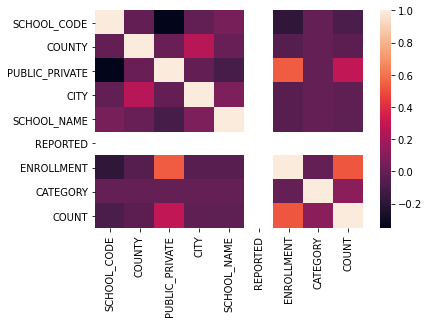

In [248]:
data_correlation = df1.corr()
ax = sns.heatmap(data_correlation)

The above heatmap indicates that immunization report highly correlates with the whole dataset. Also, there is a strong correlation between the enrollment of the students and the number of students vaccinated. ENrollment also depends upon the sector of the school.

In [249]:
# Annual Immunizations by school sector
AISS = df_new.groupby(['PUBLIC_PRIVATE','SCHOOL_YEAR'])['COUNT'].sum()
AISS

PUBLIC_PRIVATE  SCHOOL_YEAR
private         2016-2017       296327.0
                2017-2018       298194.0
                2018-2019       291563.0
public          2016-2017      3096830.0
                2017-2018      3095778.0
                2018-2019      3023811.0
Name: COUNT, dtype: float64

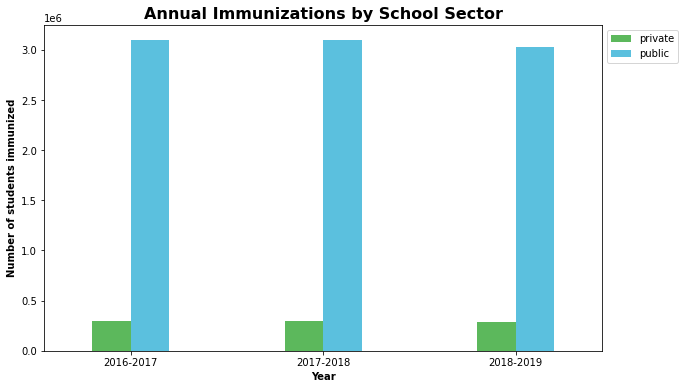

In [250]:
AISS2 = df_new.groupby(['SCHOOL_YEAR','PUBLIC_PRIVATE'])['COUNT'].sum()
AISS2.unstack().plot(kind="bar", figsize=(10,6), width = 0.4, color=['#5cb85c', '#5bc0de'])
plt.title("Annual Immunizations by School Sector", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel("Number of students immunized", fontweight='bold')
leg = plt.legend(bbox_to_anchor=(1,1))

In [251]:
# Immunization category by school sector
ICSS = df_new.groupby(['PUBLIC_PRIVATE','CATEGORY'])['COUNT'].sum()
ICSS

PUBLIC_PRIVATE  CATEGORY   
private         conditional      35771.0
                dtp             120930.0
                hepb            121946.0
                mmr             121045.0
                others           33212.0
                overdue          34244.0
                pbe              22224.0
                pme              34564.0
                polio           120883.0
                up-to-date      119124.0
                vari            122141.0
public          conditional      50167.0
                dtp            1499164.0
                hepb           1513926.0
                mmr            1504506.0
                others           42961.0
                overdue          43127.0
                pbe              20511.0
                pme              35263.0
                polio          1504988.0
                up-to-date     1482118.0
                vari           1519688.0
Name: COUNT, dtype: float64

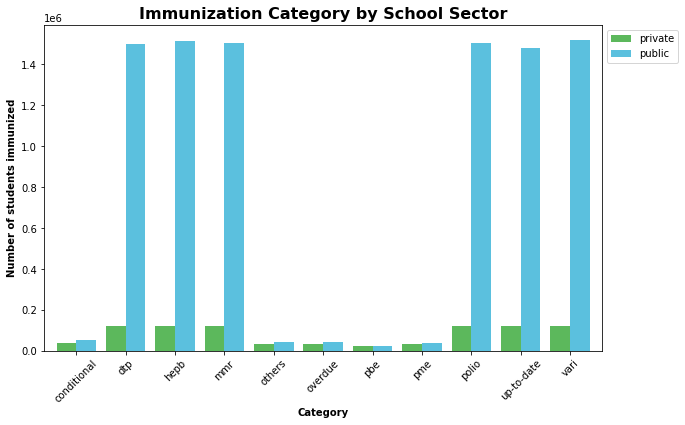

In [252]:
ICSS2 = df_new.groupby(['CATEGORY','PUBLIC_PRIVATE'])['COUNT'].sum()
ICSS2.unstack().plot(kind="bar", figsize=(10,6), width = 0.8, color=['#5cb85c', '#5bc0de'])
plt.title("Immunization Category by School Sector", fontsize=16, fontweight='bold')
plt.xlabel("Category", fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Number of students immunized", fontweight='bold')
leg = plt.legend(bbox_to_anchor=(1,1))

# Clustering

array([[26.,  6.],
       [26.,  2.],
       [26.,  1.],
       ...,
       [ 6.,  3.],
       [ 6.,  2.],
       [ 6., 10.]])

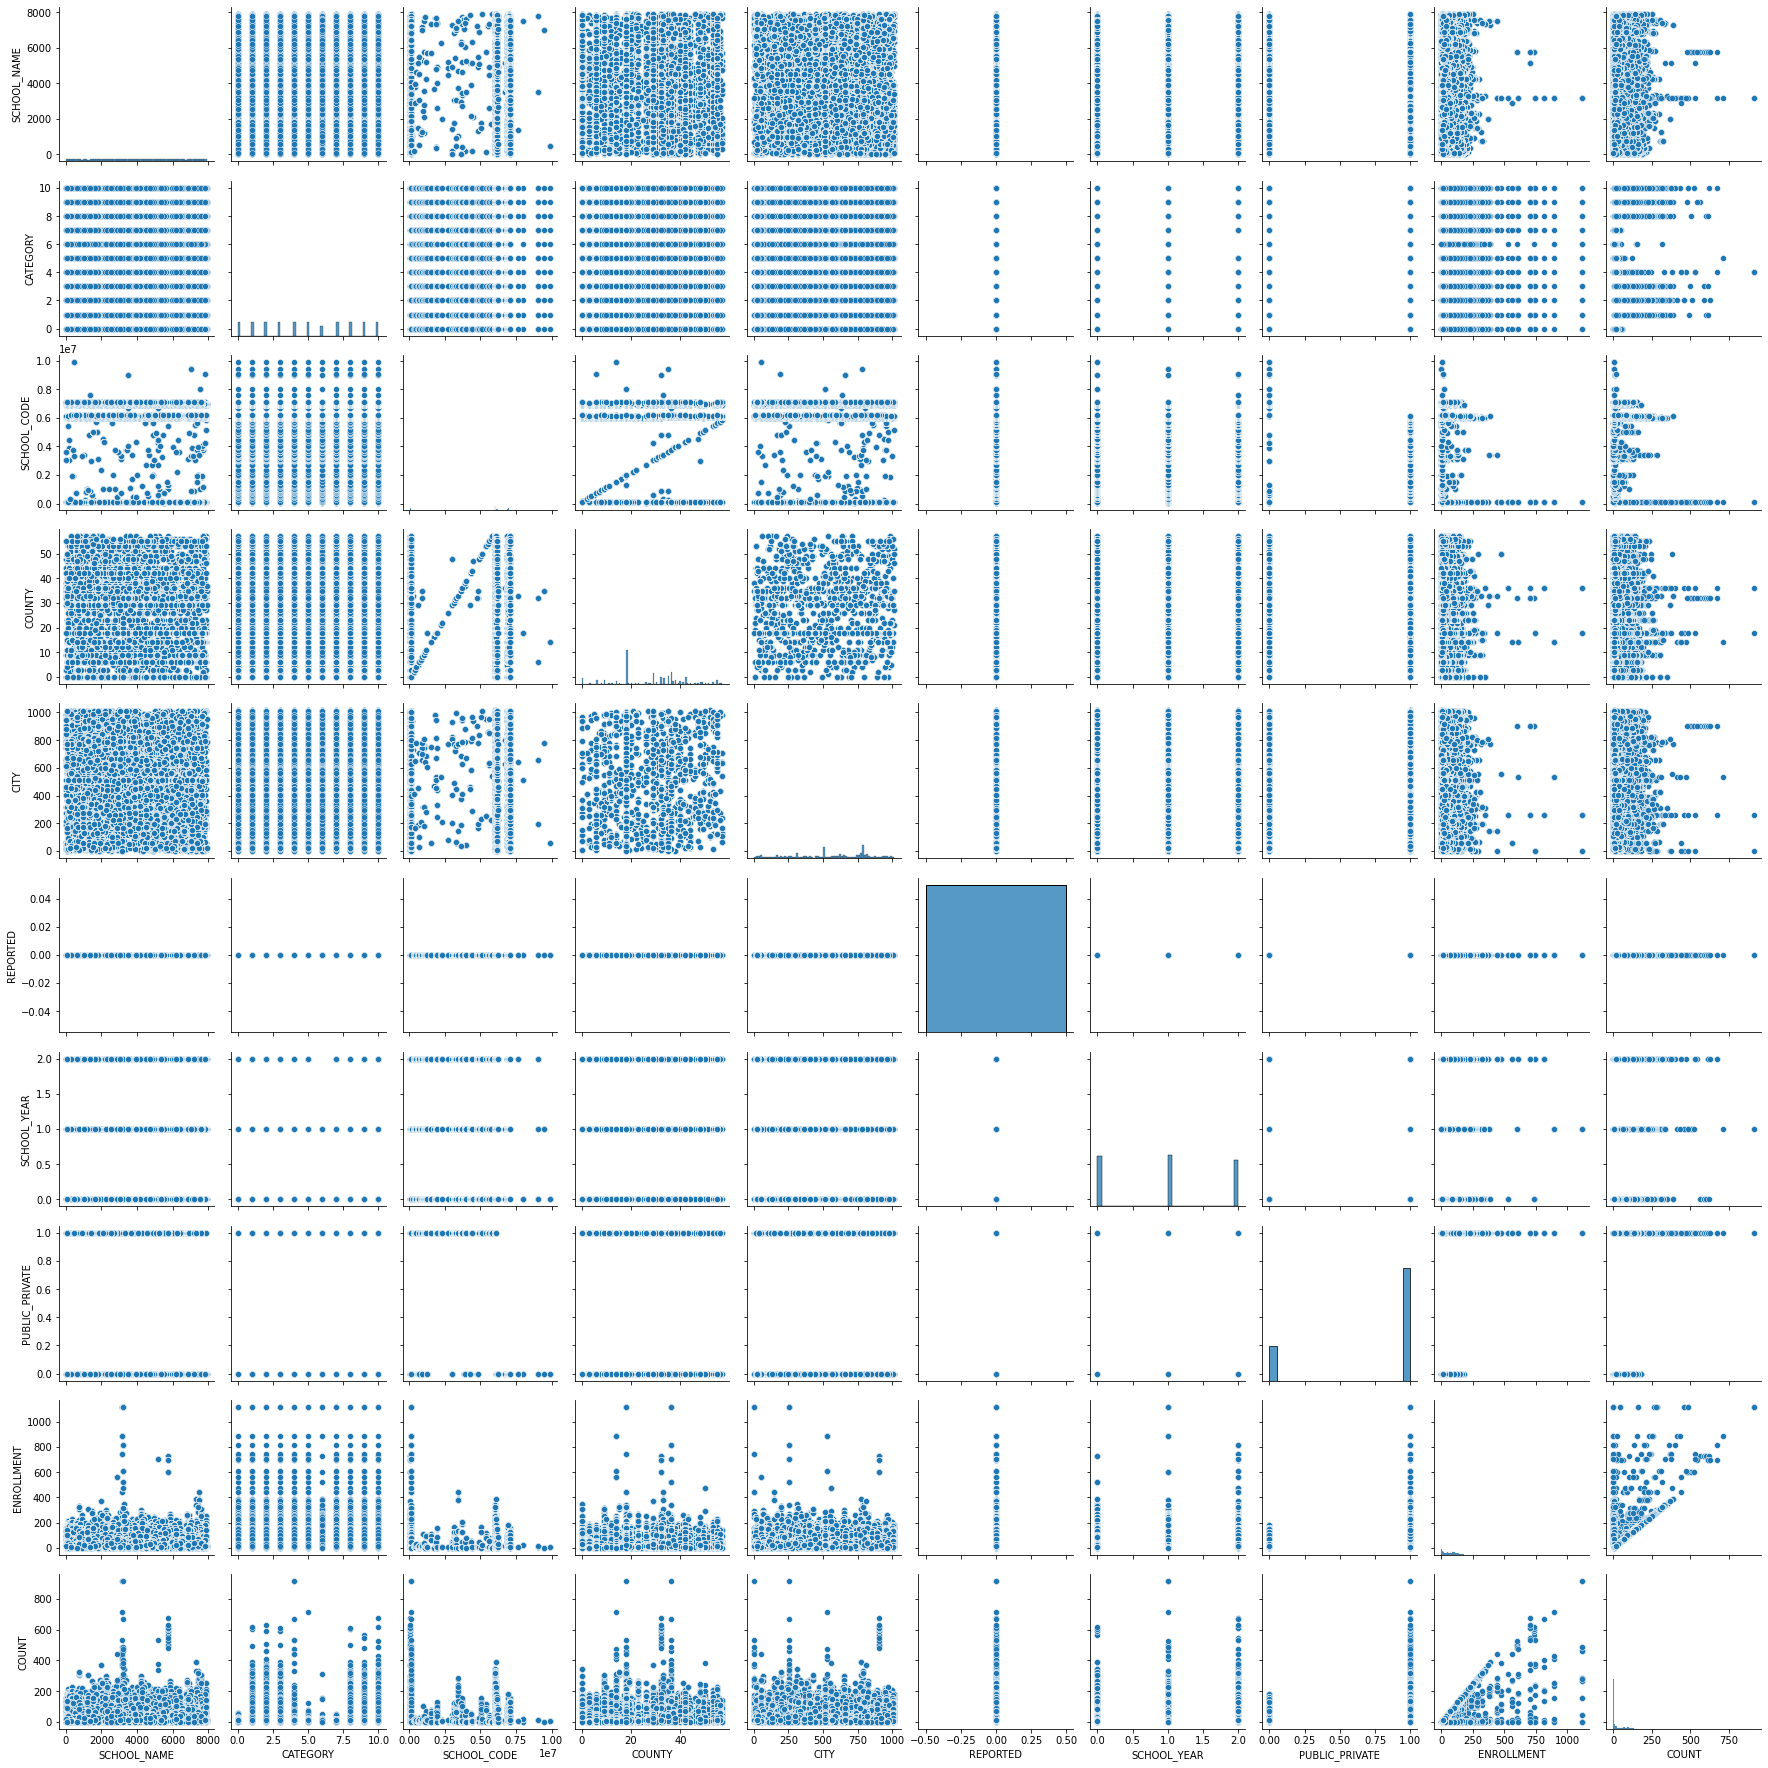

In [255]:
df_encoding = df_new.copy()
df_encoding.head()
from sklearn.preprocessing import OrdinalEncoder
#dropping school code because multiple school codes against school names
ord_enc = OrdinalEncoder()
df_encoding["SCHOOL_YEAR"] = ord_enc.fit_transform(df_new[["SCHOOL_YEAR"]])
df_encoding["COUNTY"] = ord_enc.fit_transform(df_new[["COUNTY"]])
df_encoding["PUBLIC_PRIVATE"] = ord_enc.fit_transform(df_new[["PUBLIC_PRIVATE"]])
df_encoding["CITY"] = ord_enc.fit_transform(df_new[["CITY"]])
df_encoding["SCHOOL_NAME"] = ord_enc.fit_transform(df_new[["SCHOOL_NAME"]])
df_encoding["REPORTED"] = ord_enc.fit_transform(df_new[["REPORTED"]])
df_encoding["CATEGORY"] = ord_enc.fit_transform(df_new[["CATEGORY"]])
df_encoding.head(10)
sns.pairplot(df_encoding[['SCHOOL_NAME','CATEGORY','SCHOOL_CODE','COUNTY','CITY','REPORTED', 'SCHOOL_YEAR','PUBLIC_PRIVATE','ENROLLMENT','COUNT']])


df_category = df_new[['COUNTY','CATEGORY']]
df_category = ord_enc.fit_transform(df_category)
df_category


In [256]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
#clusters = 5
#kmeans = KMeans(n_clusters = clusters)
#kmeans.fit(df_encoding)
#print(kmeans.labels_)

# x = df_encoding.values #returns a numpy array
x = df_category
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dt_normalized = pd.DataFrame(x_scaled)
X = dt_normalized.values
# #print(X)

kmeans = KMeans(n_clusters=5, n_init = 20, max_iter=500).fit(X)
labels = kmeans.labels_
# print(labels)
y_kmeans = kmeans.predict(X)

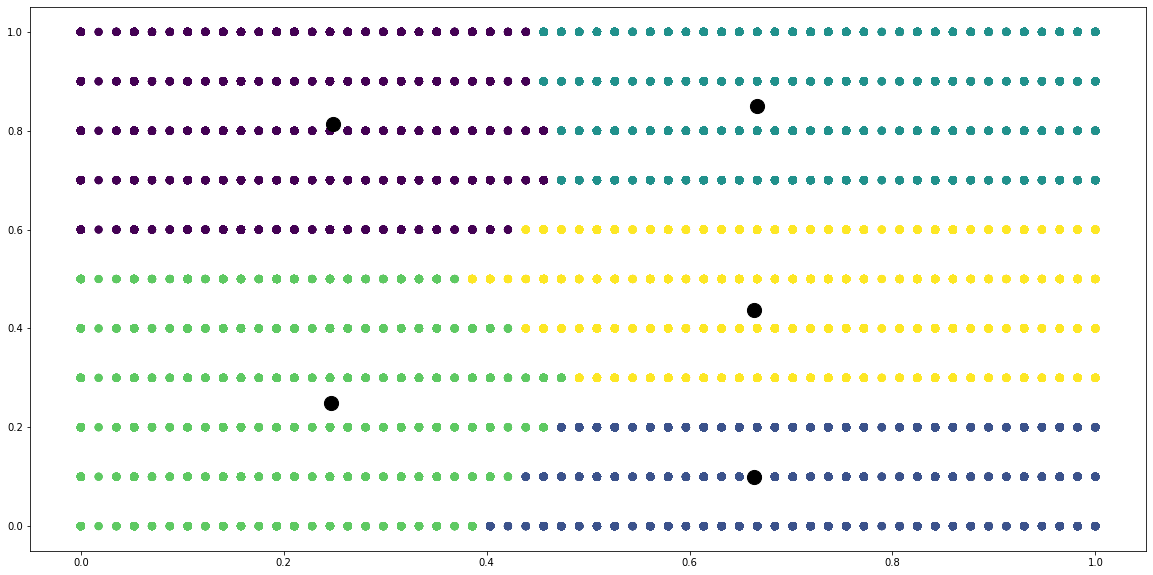

In [257]:
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)

In [258]:
from sklearn.cluster import MiniBatchKMeans
cluster = MiniBatchKMeans(n_clusters=5).fit(X)
y_kmeans = cluster.predict(X)

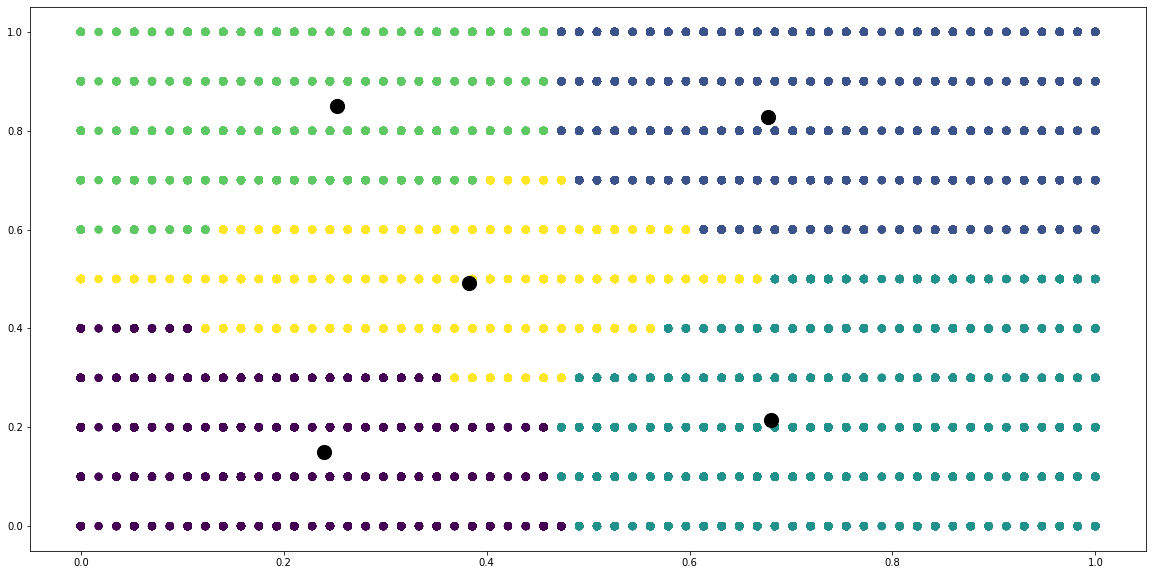

In [259]:
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)

In [260]:
df_new['Labels'] = labels
df_new.head(5)

,SCHOOL_YEAR,SCHOOL_CODE,COUNTY,PUBLIC_PRIVATE,CITY,SCHOOL_NAME,REPORTED,ENROLLMENT,CATEGORY,COUNT,Labels
0,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,pbe,10.0,4
1,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,hepb,10.0,3
2,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,dtp,10.0,1
3,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,polio,10.0,0
4,2016-2017,52749,monterey,private,prunedale,prunedale christian academy,y,10.0,up-to-date,10.0,2


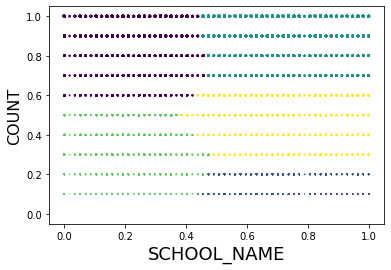

In [261]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('SCHOOL_NAME', fontsize=18)
plt.ylabel('COUNT', fontsize=16)

plt.show()

In [262]:
from matplotlib import colors as mcolors
import math

colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                      ).items())))[1]
   
   
# number of steps to taken generate n(clusters) colors 
skips = math.floor(len(colors[5 : -5])/5)
cluster_colors = colors[5 : -5 : skips]

In [263]:
df_new = df_new.sort_values(['Labels'], ascending=[True])
df_new.to_csv('outfile2.csv')